In [1]:
import pandas as pd
import pickle
import datetime as dt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#from LogIn import LogIn
#kite = LogIn().return_kite_obj()

In [3]:
budget_df = pd.read_csv('budget_new.csv')

In [4]:
budget_df = budget_df[budget_df['instrument']!='NSE:MRF']

In [5]:
budget_df['return'] = 0.05

In [6]:
budget_df['budget'] = 25000

In [7]:
budget_df

,instrument,budget,return
0,NSE:ACCELYA,25000,0.05
1,NSE:GOLDBEES,25000,0.05
2,NSE:GOLDSHARE,25000,0.05
3,NSE:NIFTYBEES,25000,0.05
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
6,NSE:BIOCON,25000,0.05
7,NSE:COLPAL,25000,0.05
8,NSE:WABCOINDIA,25000,0.05
9,NSE:ASIANPAINT,25000,0.05


# Inputs

In [8]:
begin = "2015-02-01"
end = "2020-05-31"

In [9]:
leverage = 15
exit_time = dt.time(15, 10)

# Process

In [10]:
import datetime

# borrowed from https://stackoverflow.com/a/13565185
# as noted there, the calendar module has a function of its own
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

def monthlist(begin,end):
    begin = datetime.datetime.strptime(begin, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")

    result = []
    while True:
        if begin.month == 12:
            next_month = begin.replace(year=begin.year+1,month=1, day=1)
        else:
            next_month = begin.replace(month=begin.month+1, day=1)
        if next_month > end:
            break
        result.append ([begin.strftime("%Y-%m-%d"),last_day_of_month(begin).strftime("%Y-%m-%d")])
        begin = next_month
    result.append ([begin.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d")])
    return result


date_list = monthlist(begin,end)

In [11]:
def get_clean_data(instrument):
    
    print(instrument)

    all_data_df = pd.DataFrame()

    for time_range in date_list:
        print(time_range)

        from_date = time_range[0]
        to_date = time_range[1]

        data_df = pd.read_pickle('./data_new/{}_{}_{}.pkl'.format(instrument, from_date, to_date))

        data_df.rename(columns={'date':'timestamp'}, inplace=True)
        data_df['date'] = data_df['timestamp'].dt.date
        data_df['day'] = data_df['timestamp'].dt.day_name()
        print(len(data_df))

        sanity_check = data_df.groupby('date').count().reset_index()
        incomplete_data_days = sanity_check[sanity_check['volume']<300]
        print(len(incomplete_data_days))

        data_df = data_df[~data_df['date'].isin(incomplete_data_days.date.tolist())]
        data_df['instrument'] = instrument
        print(len(data_df)/375)

        all_data_df = all_data_df.append(data_df, ignore_index=True)

    return all_data_df

In [12]:
header_list = ['instrument', 'high_prev', 'low_prev', 'open_today', 'condition', 'transaction_type', 'trade_number', 'level', 'budget', 'return', 'daily_khwab', 'actual_khwab', 'quantity', 'budget_required', 'price', 'trigger_price', 'squareoff', 'stoploss', 'order_id', 'timestamp', 'order_type', 'status', 'profit', 'pl_tag', 'flag', 'adhoora_khwab']


In [13]:
calculate = False

if calculate:
    
    all_trades = pd.DataFrame(columns=header_list)

    for instrument in budget_df.instrument.tolist():

        try:
            all_data_df = get_clean_data(instrument)

            for i in range(len(all_data_df.date.unique().tolist())-1):

                date_prev = all_data_df.date.unique().tolist()[i]
                data_prev = all_data_df[all_data_df['date']==date_prev]
                open_prev = data_prev.open.iloc[0]
                close_prev = data_prev.open.iloc[-1]
                high_prev = data_prev.high.max()
                low_prev = data_prev.low.min()

                date_today = all_data_df.date.unique().tolist()[i+1]
                data_today = all_data_df[all_data_df['date']==date_today]

                # Trim beyond exit time
                data_today = data_today[data_today['timestamp'].dt.time<exit_time]
                open_today = data_today.open.iloc[0]

                if (open_today > high_prev) & (open_today < 1.15 * high_prev):

                    condition = 'high'
                    transaction_type = 'sell'

                elif (open_today < low_prev) & (open_today > 0.85 * low_prev):

                    condition = 'low'
                    transaction_type = 'buy'

                else:

                    condition = None
                    transaction_type = None

                if condition is not None:

                    valid_trades = all_trades[(all_trades['instrument']==instrument) & (all_trades['condition']==condition) & (all_trades['status']=='complete')]
                    last_valid_trade = valid_trades[valid_trades['trade_number']==valid_trades['trade_number'].max()]

                    # Calculate trade number
                    if len(last_valid_trade):
                        trade_number = int(last_valid_trade['trade_number']) + 1
                    else:
                        trade_number = 1
                    
                    # Calculate level
                    if len(last_valid_trade):
                        if float(last_valid_trade['pl_tag'])==1.0:
                            level = 1
                        else:
                            level = float(last_valid_trade['level']) + 1
                    else:
                        level = 1

                    # Calculate budget and return
                    if level==1:
                        budget = float(budget_df[budget_df['instrument']==instrument]['budget'])
                        return_ = float(budget_df[budget_df['instrument']==instrument]['return'])
                    else:
                        budget = float(last_valid_trade['budget'])
                        return_ = float(last_valid_trade['return'])

                    # Calculate daily khwab
                    if len(last_valid_trade):
                        if int(last_valid_trade['pl_tag'])==1:
                            daily_khwab = round(return_ * budget, 2)
                        else:
                            daily_khwab = 0
                    else:
                        daily_khwab = round(return_ * budget, 2)

                    # Calculate actual khwab
                    if len(last_valid_trade):
                        actual_khwab = max(round(float(last_valid_trade['adhoora_khwab']) + daily_khwab, 2), round(return_ * budget, 2))
                    else:
                        actual_khwab = round(return_ * budget, 2)

                    # Caluclate tax
                    if actual_khwab > 5 * (round(return_ * budget, 2)):
                        factor = 2.5
                    else:
                        factor = 2.5
                        
                    tax = factor * (0.0005647 * actual_khwab)/return_
                    actual_khwab = round(actual_khwab + tax, 2)
                    
                    # Calculate quantity
                    quantity = int(round(actual_khwab/(return_ * open_today)))

                    # Calculate budget required
                    budget_required = round(quantity * open_today, 2)

                    # Calculate price and trigger price
                    if transaction_type=='buy':
                        price = round(open_today + 0.05 * max(round(20 * 0.0025 * open_today), 2), 2)
                        trigger_price = round(open_today + 0.05 * max(round(20 * 0.002 * open_today),1), 2)
                    else:
                        price = round(open_today - 0.05 * max(round(20 * 0.0025 * open_today), 2), 2)
                        trigger_price = round(open_today - 0.05 * max(round(20 * 0.002 * open_today),1), 2)

                    # Calculate square off and stoploss
                    squareoff = round(return_ * price, 1)
                    stoploss = round(return_ * (4.25/5) * price, 1)

                    # Calculate order_id, order_type
                    order_id = trade_number
                    order_type = 'SL'

                    # Calculate timestamp, status and profit
                    if transaction_type=='buy':
                        
                        if data_today.high.max() < trigger_price:

                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['high'] > price + squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['low'] < price - stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((row['close']-price) * quantity, 2)

                    else:

                        if data_today.low.min() > trigger_price:
                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0        

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['low'] < price - squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['high'] > price + stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((price - row['close']) * quantity, 2)

                    # Calculate P/L tag
                    pl_tag = round(round(float(profit), 2) / (float(squareoff) * float(quantity)), 1)

                    # Calculate flag
                    if abs(float(pl_tag))==1:
                        flag = 1
                    else:
                        flag = 0

                    # Calculate adhoora khwab
                    adhoora_khwab = round(float(actual_khwab) - profit, 2)

                    trades_today = pd.DataFrame(data={'instrument':[instrument], 
                                                      'high_prev':[high_prev], 
                                                      'low_prev':[low_prev], 
                                                      'open_today':[open_today], 
                                                      'condition':[condition], 
                                                      'transaction_type':[transaction_type], 
                                                      'trade_number':[trade_number], 
                                                      'level':[level], 
                                                      'budget':[budget], 
                                                      'return':[return_], 
                                                      'daily_khwab':[daily_khwab], 
                                                      'actual_khwab':[actual_khwab], 
                                                      'quantity':[quantity], 
                                                      'budget_required':[budget_required], 
                                                      'price':[price], 
                                                      'trigger_price':[trigger_price], 
                                                      'squareoff':[squareoff], 
                                                      'stoploss':[stoploss], 
                                                      'order_id':[order_id], 
                                                      'timestamp':[timestamp], 
                                                      'order_type':[order_type], 
                                                      'status':[status], 
                                                      'profit':[profit], 
                                                      'pl_tag':[pl_tag], 
                                                      'flag':[flag], 
                                                      'adhoora_khwab':[adhoora_khwab]
                                                     })

                    all_trades = all_trades.append(trades_today, ignore_index = True)
        except Exception as ex:
            print('Failed calculation for {} : {}'.format(instrument, ex))
            
    all_trades.to_pickle('all_trades_opp_brokerage_return_newdata_trigger2_stoploss4_{}_{}.pkl'.format(begin, end))
    
else:
    
    all_trades = pd.read_pickle('all_trades_opp_brokerage_return_newdata_trigger2_stoploss4_{}_{}.pkl'.format(begin, end))

# High Trades Analysis

In [14]:
less_100 = all_trades[all_trades['low_prev']<100].instrument.unique().tolist()

In [15]:
len(less_100)

22

In [16]:
all_trades['new_timestamp'] = all_trades.apply(lambda s: s['timestamp'].tz_convert(None), axis=1)

In [17]:
all_trades[~all_trades['instrument'].isin(less_100)].instrument.nunique()

63

In [18]:
high_trades = all_trades[(all_trades['condition']=='high') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]


In [19]:
high_trades_loop = pd.DataFrame()
for instrument in high_trades.instrument.unique().tolist():
    instrument_high_trades = high_trades[high_trades['instrument']==instrument]
    instrument_high_trades_loop = instrument_high_trades[instrument_high_trades['trade_number']<=instrument_high_trades[instrument_high_trades['pl_tag']==1.0].trade_number.max()]
    high_trades_loop = high_trades_loop.append(instrument_high_trades_loop, ignore_index=True)
    

In [20]:
high_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
1227,NSE:POWERGRID,148.85,145.00,149.30,high,sell,1,1,25000.0,0.05,1250.0,1285.29,172,25679.60,148.95,149.00,7.4,6.3,1,2015-02-12 15:09:00+05:30,SL,complete,-34.4,-0.0,0,1319.69,2015-02-12 09:39:00
1228,NSE:POWERGRID,157.50,152.15,158.35,high,sell,2,2,25000.0,0.05,0.0,1356.95,171,27077.85,157.95,158.05,7.9,6.7,2,2015-02-28 15:09:00+05:30,SL,complete,205.2,0.2,0,1151.75,2015-02-28 09:39:00
1229,NSE:POWERGRID,156.35,154.15,156.45,high,sell,3,3,25000.0,0.05,0.0,1285.29,164,25657.80,156.05,156.15,7.8,6.6,3,2015-03-04 15:09:00+05:30,SL,complete,360.8,0.3,0,924.49,2015-03-04 09:39:00
1230,NSE:POWERGRID,151.60,147.40,151.70,high,sell,4,4,25000.0,0.05,0.0,1285.29,169,25637.30,151.30,151.40,7.6,6.4,4,2015-04-10 15:09:00+05:30,SL,complete,-236.6,-0.2,0,1521.89,2015-04-10 09:39:00
1231,NSE:POWERGRID,141.05,138.15,141.80,high,sell,5,5,25000.0,0.05,0.0,1564.86,221,31337.80,141.45,141.50,7.1,6.0,5,2015-05-08 15:09:00+05:30,SL,complete,309.4,0.2,0,1255.46,2015-05-08 09:39:00


In [21]:
high_trades.instrument.nunique()

63

In [22]:
high_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,23147.05,1184607.00
1,NSE:AMARAJABAT,24351.20,88317.00
2,NSE:AMBUJACEM,10652.20,244411.30
3,NSE:ASIANPAINT,6698.70,280952.00
4,NSE:AUROPHARMA,24855.62,220980.00
5,NSE:BAJAJ-AUTO,9855.80,78631.20
6,NSE:BATAINDIA,18230.11,196799.40
7,NSE:BERGEPAINT,14491.64,135677.00
8,NSE:BHARTIARTL,13485.70,237864.00
9,NSE:BOSCHLTD,18861.70,75095.20


In [23]:
high_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,26211.80,1184607.00
1,NSE:AMARAJABAT,24282.60,88317.00
2,NSE:AUROPHARMA,20272.32,101053.90
3,NSE:BAJAJ-AUTO,11025.70,55880.00
4,NSE:BATAINDIA,7105.36,58752.00
5,NSE:BERGEPAINT,7813.34,87189.54
6,NSE:BOSCHLTD,16965.65,75095.20
7,NSE:BRITANNIA,2987.57,111128.70
8,NSE:CADILAHC,10475.74,194545.00
9,NSE:CESC,14490.60,76273.05


# Low Trades Analysis

In [24]:
low_trades = all_trades[(all_trades['condition']=='low') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]


In [25]:
low_trades_loop = pd.DataFrame()
for instrument in low_trades.instrument.unique().tolist():
    instrument_low_trades = low_trades[low_trades['instrument']==instrument]
    instrument_low_trades_loop = instrument_low_trades[instrument_low_trades['trade_number']<=instrument_low_trades[instrument_low_trades['pl_tag']==1.0].trade_number.max()]
    low_trades_loop = low_trades_loop.append(instrument_low_trades_loop, ignore_index=True)
    

In [26]:
low_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
1226,NSE:POWERGRID,146.90,143.00,142.45,low,buy,1,1,25000.0,0.05,1250.0,1285.29,180,25641.0,142.80,142.75,7.1,6.1,1,2015-02-06 15:09:00+05:30,SL,complete,-9.00,-0.0,0,1294.29,2015-02-06 09:39:00
1235,NSE:POWERGRID,141.25,138.90,138.00,low,buy,2,2,25000.0,0.05,0.0,1330.83,193,26634.0,138.35,138.30,6.9,5.9,2,2015-06-29 15:09:00+05:30,SL,complete,212.30,0.2,0,1118.53,2015-06-29 09:39:00
1236,NSE:POWERGRID,142.95,140.60,140.50,low,buy,3,3,25000.0,0.05,0.0,1285.29,183,25711.5,140.85,140.80,7.0,6.0,3,2015-07-06 15:09:00+05:30,SL,complete,-100.65,-0.1,0,1385.94,2015-07-06 09:39:00
1237,NSE:POWERGRID,141.50,138.25,138.10,low,buy,4,4,25000.0,0.05,0.0,1425.07,206,28448.6,138.45,138.40,6.9,5.9,4,2015-07-08 15:09:00+05:30,SL,complete,-10.30,-0.0,0,1435.37,2015-07-08 09:39:00
1238,NSE:POWERGRID,138.40,136.10,135.10,low,buy,5,5,25000.0,0.05,0.0,1475.90,218,29451.8,135.45,135.35,6.8,5.8,5,2015-08-20 15:09:00+05:30,SL,complete,54.50,0.0,0,1421.40,2015-08-20 09:39:00


In [27]:
low_trades.instrument.nunique()

63

In [28]:
low_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,5307.95,73418.80
1,NSE:AMARAJABAT,12291.35,78742.80
2,NSE:AMBUJACEM,10784.35,116975.20
3,NSE:ASIANPAINT,4829.65,187762.60
4,NSE:AUROPHARMA,11858.55,118780.00
5,NSE:BAJAJ-AUTO,6595.40,99540.00
6,NSE:BATAINDIA,9163.06,114912.00
7,NSE:BERGEPAINT,8325.52,202315.05
8,NSE:BHARTIARTL,12225.10,156595.50
9,NSE:BOSCHLTD,5675.40,176373.00


In [29]:
low_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:AMARAJABAT,10315.25,78742.80
1,NSE:AMBUJACEM,9283.55,116975.20
2,NSE:AUROPHARMA,8006.75,71294.85
3,NSE:BATAINDIA,10033.06,114912.00
4,NSE:BERGEPAINT,2711.99,54899.46
5,NSE:BHARTIARTL,11697.45,156595.50
6,NSE:BOSCHLTD,4607.10,107255.00
7,NSE:CADILAHC,17818.42,279872.40
8,NSE:CESC,9384.90,176700.00
9,NSE:CIPLA,4175.10,60024.00


# Results

In [30]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades_loop),
                           round(high_trades_loop.profit.sum(), 2), 
                           round(high_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades_loop.budget_required.max()), 
                           round(high_trades_loop.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades_loop),
                          round(low_trades_loop.profit.sum(), 2), 
                          round(low_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades_loop.budget_required.max()),
                          round(low_trades_loop.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6566.00,3815.00
trades_considered,3338.00,2097.00
profit,643379.28,513453.21
perc_return,28.59,22.82
hightest_budget_required,1324004.00,1634943.00
hightest_margin_required,88267.00,108996.00


In [31]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades),
                           round(high_trades.profit.sum(), 2), 
                           round(high_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades.budget_required.max()), 
                           round(high_trades.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades),
                          round(low_trades.profit.sum(), 2), 
                          round(low_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades.budget_required.max()),
                          round(low_trades.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6566.00,3815.00
trades_considered,6566.00,3815.00
profit,987190.75,654554.79
perc_return,43.88,29.09
hightest_budget_required,1737120.00,1634943.00
hightest_margin_required,115808.00,108996.00


# Daily Margin Required Analysis

In [32]:
all_trades['date'] = all_trades['timestamp'].dt.date
all_trades = all_trades[(~all_trades['instrument'].isin(less_100))]
all_trades['margin_required'] = all_trades['budget_required']/leverage
margins = all_trades.groupby('date').agg({'budget_required':sum, 'margin_required':sum, 'instrument':list}).reset_index()

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels, rotation='vertical')

    if y_label:
        plt.ylabel(y_label)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [34]:
df2 = all_trades.groupby(['date', 'instrument'])['margin_required'].sum().unstack('instrument').fillna(0)
df = df2.transpose()

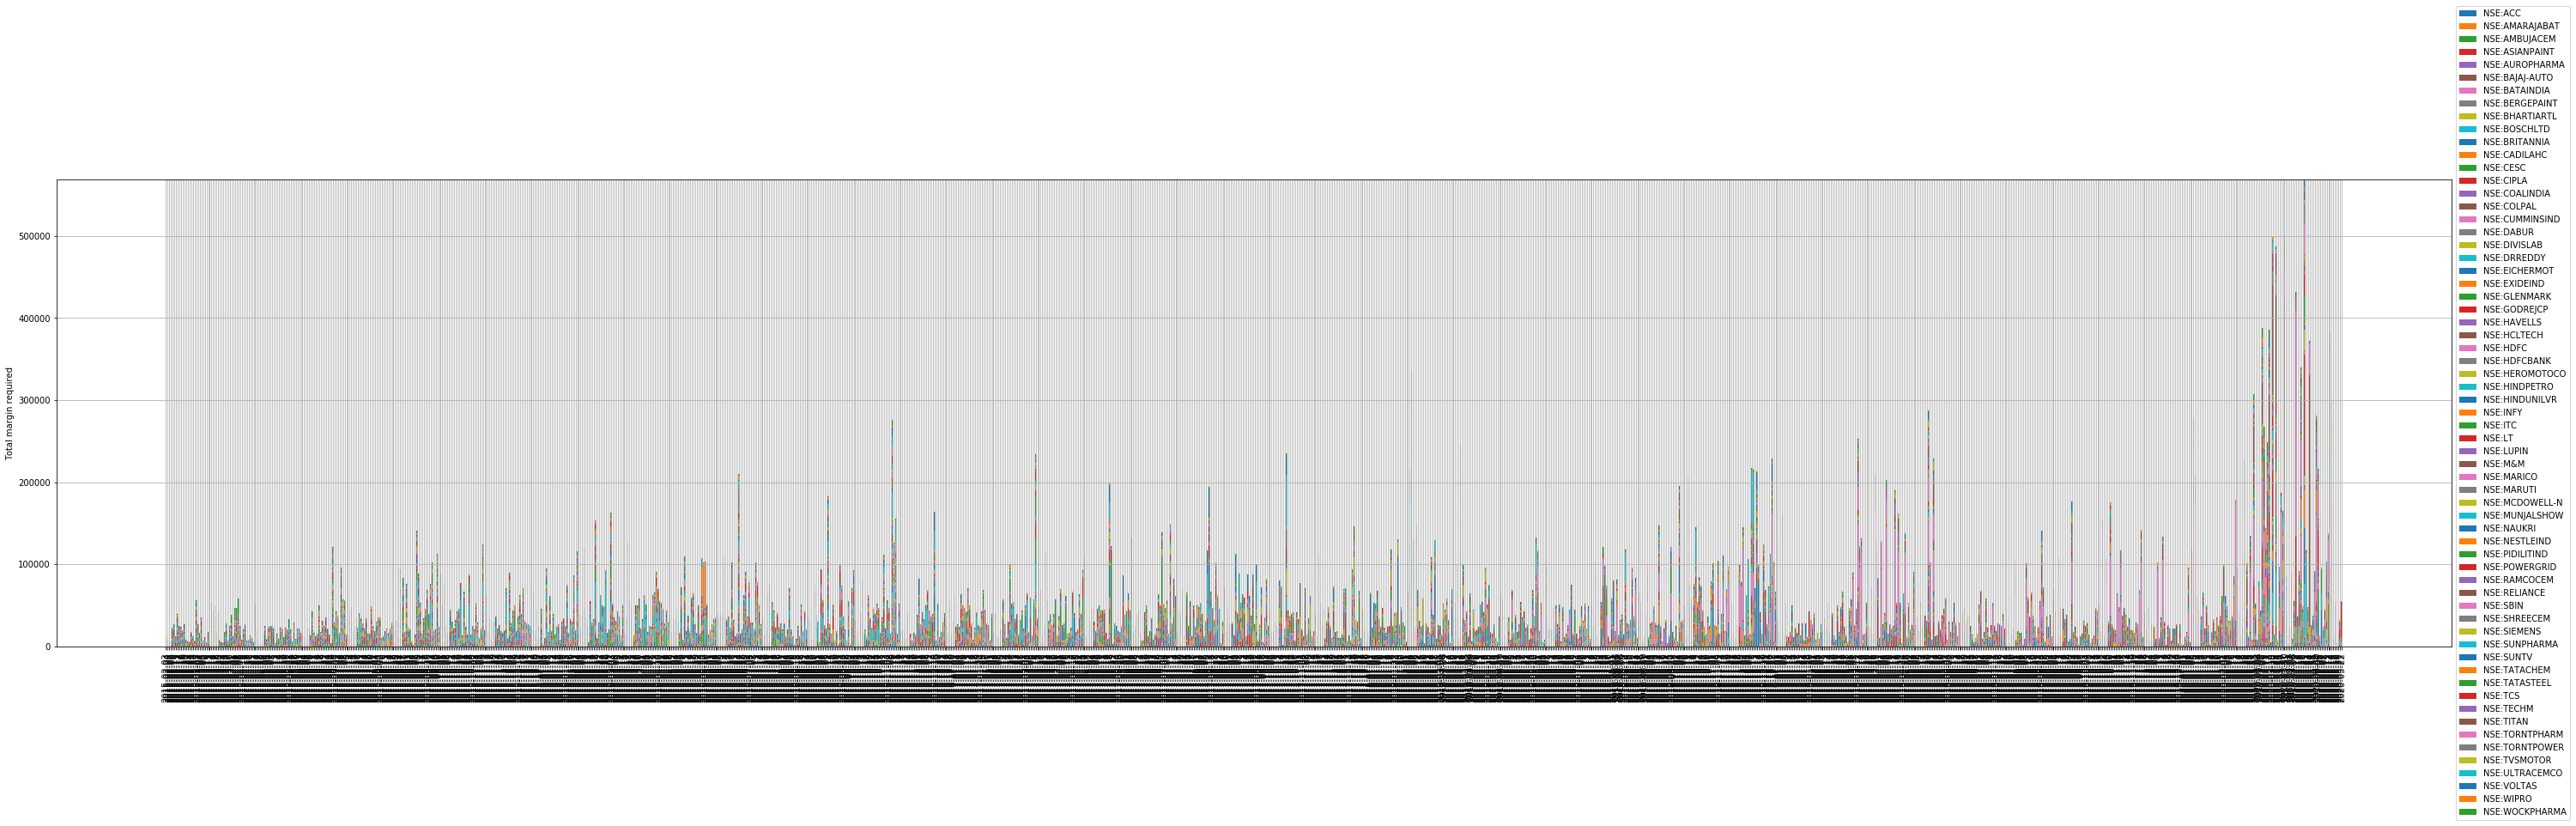

In [35]:
plt.figure(figsize=(50, 10))

series_labels = df.index.tolist()

data = df.values

category_labels = df.columns.tolist()

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False,
    value_format="{:.1f}",
    y_label="Total margin required"
)

plt.savefig('margin_required_opp_brokerage_return_newdata_trigger2_stoploss4_{}_{}.png'.format(begin, end))
plt.show()

## Brokerage Calculation

In [47]:
def brokerage_calculator(budget_required):
    
    brokerage = min(40, 0.0006 * budget_required)
    stt = 0.00025 * budget_required
    transaction_charges = 2 * 0.0000325 * budget_required
    gst = 0.18 * (brokerage + transaction_charges)
    sebi = 10 * budget_required/10000000
    stamp_charges = 0.003 * 0.01 * budget_required
    total_tax_and_charges = brokerage + stt + transaction_charges + gst + sebi + stamp_charges
    
    return total_tax_and_charges

In [48]:
all_trades.apply(lambda s: brokerage_calculator(s['budget_required']), axis=1).sum()

717542.017949284

# Postmartem

In [37]:
high_trades[high_trades['budget_required']==high_trades['budget_required'].max()]

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
13570,NSE:HDFC,2065.0,2035.0,2068.0,high,sell,110,110,25000.0,0.05,0.0,86885.98,840,1737120.0,2062.85,2063.85,103.1,87.7,110,2019-04-08 15:09:00+05:30,SL,complete,7602.0,0.1,0,79283.98,2019-04-08 09:39:00


In [38]:
high_trades[high_trades['instrument']=='NSE:PFC']

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp


In [39]:
low_trades[low_trades['budget_required']==low_trades['budget_required'].max()]

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
10283,NSE:EICHERMOT,27799.0,27300.2,26802.35,low,buy,29,28,25000.0,0.05,0.0,81430.11,61,1634943.35,26869.35,26855.95,1343.5,1141.9,29,2018-02-06 15:09:00+05:30,SL,complete,42065.6,0.5,0,39364.51,2018-02-06 09:39:00


In [40]:
low_trades[low_trades['instrument']=='NSE:PFC']

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp


# Identifying day with max budget (all instruments)

In [41]:
x = df.reset_index()
x1 = df2.reset_index()
y = x.sum().reset_index()[1:].rename(columns={0:'margin'})
y[y['margin']==y['margin'].max()]

,date,margin
1270,2020-04-21,568939


In [42]:
x1[x1['date']==pd.Timestamp('2020-04-21')]

instrument,date,NSE:ACC,NSE:AMARAJABAT,NSE:AMBUJACEM,NSE:ASIANPAINT,NSE:AUROPHARMA,NSE:BAJAJ-AUTO,NSE:BATAINDIA,NSE:BERGEPAINT,NSE:BHARTIARTL,NSE:BOSCHLTD,NSE:BRITANNIA,NSE:CADILAHC,NSE:CESC,NSE:CIPLA,NSE:COALINDIA,NSE:COLPAL,NSE:CUMMINSIND,NSE:DABUR,NSE:DIVISLAB,NSE:DRREDDY,NSE:EICHERMOT,NSE:EXIDEIND,NSE:GLENMARK,NSE:GODREJCP,NSE:HAVELLS,NSE:HCLTECH,NSE:HDFC,NSE:HDFCBANK,NSE:HEROMOTOCO,NSE:HINDPETRO,NSE:HINDUNILVR,NSE:INFY,NSE:ITC,NSE:LT,NSE:LUPIN,NSE:M&M,NSE:MARICO,NSE:MARUTI,NSE:MCDOWELL-N,NSE:MUNJALSHOW,NSE:NAUKRI,NSE:NESTLEIND,NSE:PIDILITIND,NSE:POWERGRID,NSE:RAMCOCEM,NSE:RELIANCE,NSE:SBIN,NSE:SHREECEM,NSE:SIEMENS,NSE:SUNPHARMA,NSE:SUNTV,NSE:TATACHEM,NSE:TATASTEEL,NSE:TCS,NSE:TECHM,NSE:TITAN,NSE:TORNTPHARM,NSE:TORNTPOWER,NSE:TVSMOTOR,NSE:ULTRACEMCO,NSE:VOLTAS,NSE:WIPRO,NSE:WOCKPHARMA
1269,2020-04-21,4745.8,1715.04,1711.05,0.0,0.0,1718.933333,1730.666667,0.0,1839.2,62130.3,68570.866667,46758.55,0.0,1695.466667,1710.8,1709.746667,0.0,0.0,11781.0,0.0,1860.686667,0.0,0.0,145785.333333,0.0,0.0,3228.666667,1726.666667,25229.413333,0.0,6696.8,1715.986667,33570.8,24757.2,4295.7,6864.65,0.0,7867.993333,1705.036667,0.0,0.0,2240.0,1723.8,0.0,0.0,0.0,38803.2,23940.0,4059.8,0.0,6230.89,0.0,1717.64,1882.666667,2384.666667,0.0,0.0,3248.0,0.0,1618.866667,6248.666667,1718.4,0.0
